# Exercise 1

## No friction

$$
x'' = x - x^5
$$

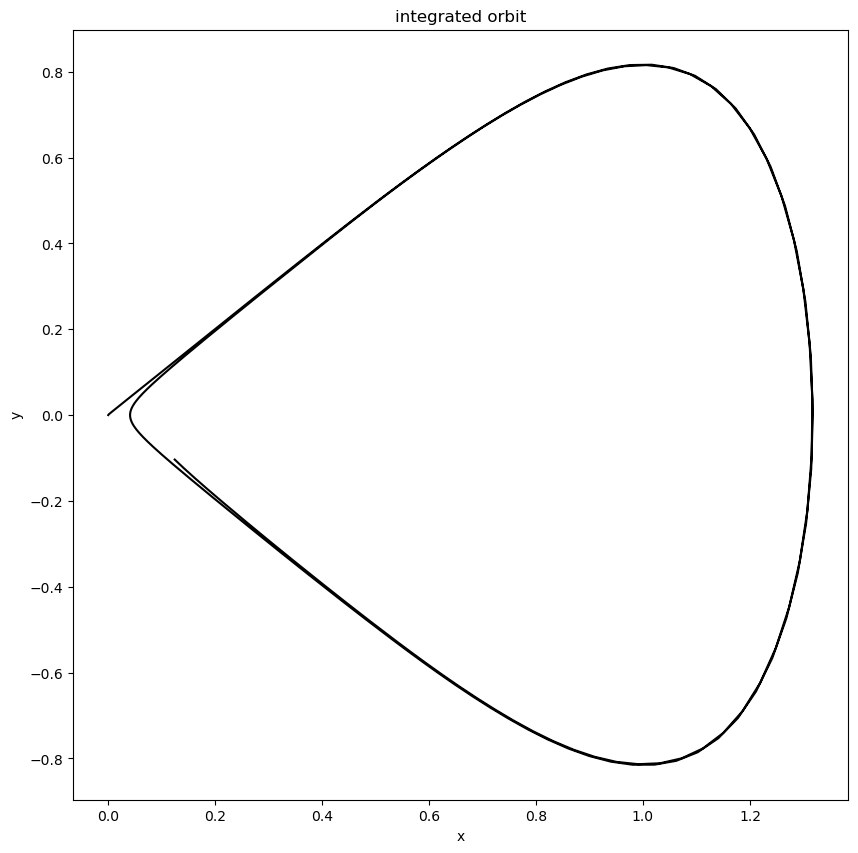

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Define the system of differential equations
def system(t, state):
    x, y = state
    dxdt = y
    dydt = x - x**5
    return [dxdt, dydt]


# Initial condition close to the origin
initial_conditions = [0.001, 0]

# Time span for integration
t_span = (0, 20)

# Integrate the system
solution = solve_ivp(system, t_span, initial_conditions, dense_output=True)

# Extract the solution
t = np.linspace(0, 20, 400)
x, y = solution.sol(t)

# Plot the phase portrait
plt.figure(figsize=(10, 10))
plt.plot(x, y, color="k")
plt.xlabel("x")
plt.ylabel("y")
plt.title("integrated orbit")
plt.savefig('exp_orbit.png')

-3.99842328173694e-05


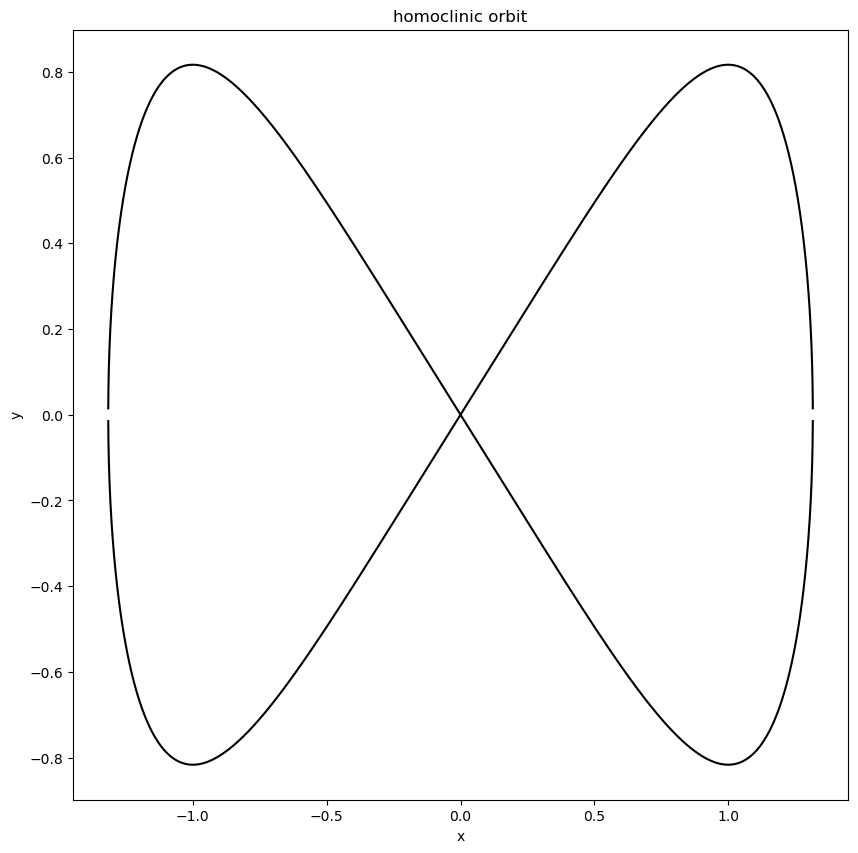

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x
x = np.concatenate((np.linspace(0, 1, 200), np.linspace(1, 1.5, 10000)))
f = lambda x: x**2 - x**6 / 3

cutoff = 0
for i, v in enumerate(x):
    if f(v) < 0:
        print(f(v))
        cutoff = i
        break
x = x[:cutoff]
x = np.concatenate((-x[::-1], x))

# Calculate y for the homoclinic orbit
y_positive = np.sqrt(f(x))
y_negative = -np.sqrt(f(x))

# Plot the homoclinic orbit
plt.figure(figsize=(10, 10))
plt.plot(x, y_positive, color="k")
plt.plot(x, y_negative, color="k")
plt.xlabel("x")
plt.ylabel("y")
plt.title("homoclinic orbit")
plt.savefig('th_orbit.png')

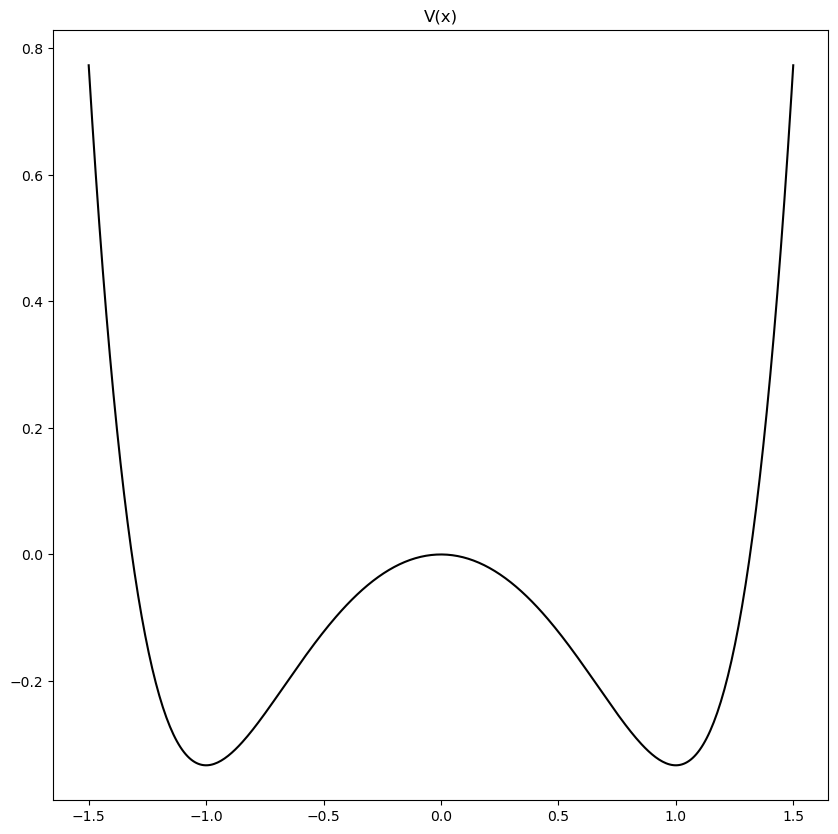

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function V(x)
def potential(x):
    return (x**6 / 6) - (x**2 / 2)

# Generate x values
x = np.linspace(-1.5, 1.5, 400)

# Compute the potential V(x)
V = potential(x)

# Plot the potential function
plt.figure(figsize=(10, 10))
plt.plot(x, V, color='k')
plt.title('V(x)')
plt.savefig('potential.png')

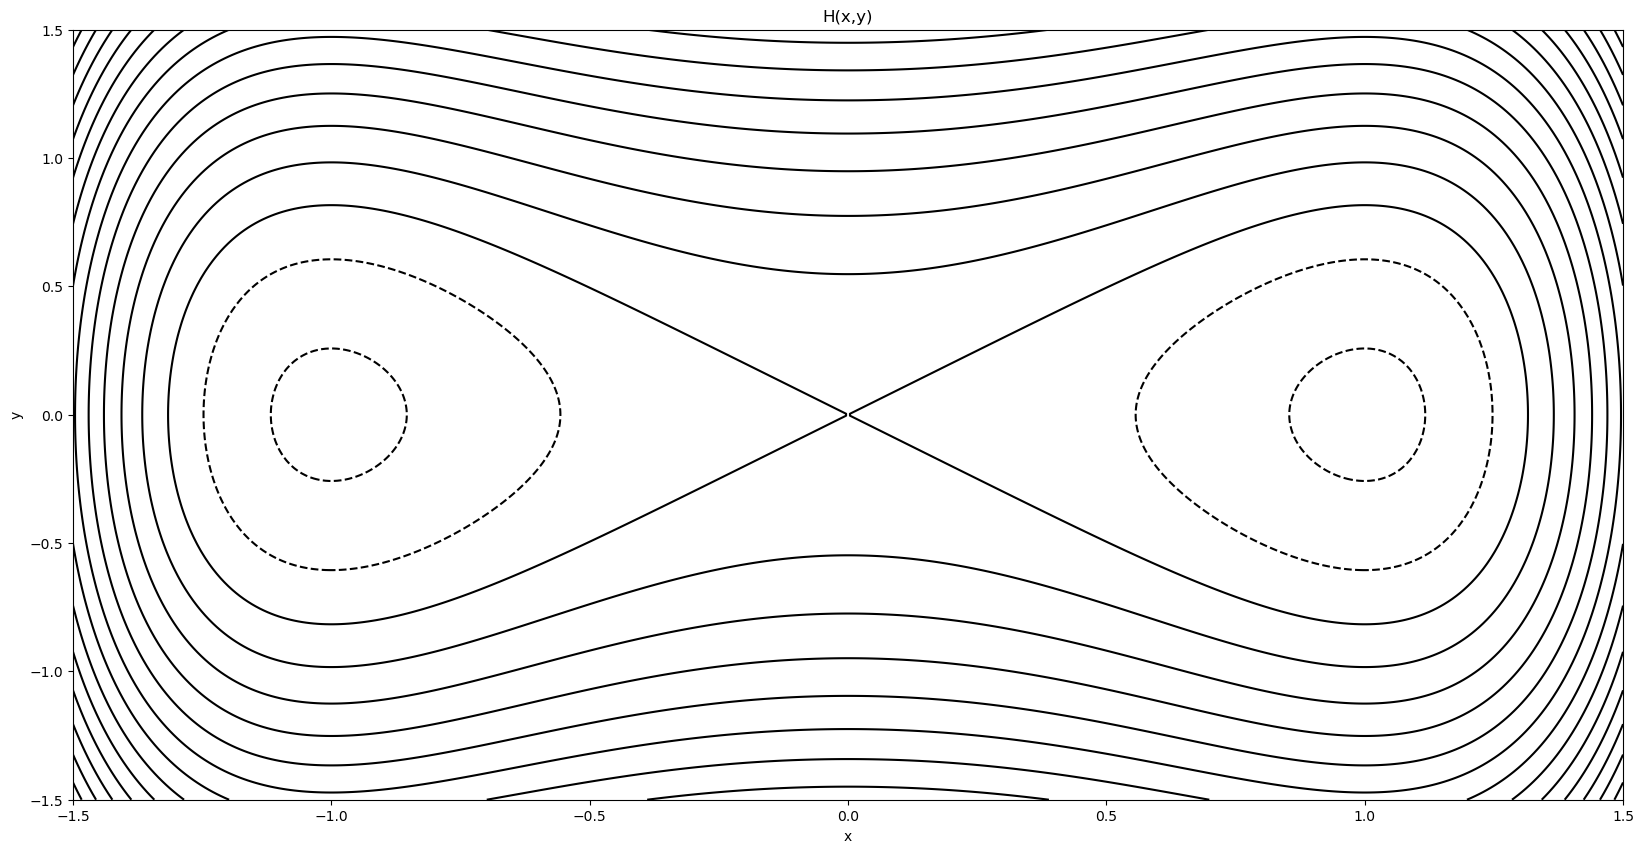

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian(x, y):
    return 0.5 * y**2 + (x**6 / 6) - (x**2 / 2)

x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)

H = hamiltonian(X, Y)

plt.figure(figsize=(20, 10))
contour = plt.contour(X, Y, H, levels=20, colors='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('H(x,y)')
plt.savefig('contour.png')

## Friction case

$$
x'' = x - x^5
$$

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def friction(eps, title, filename):
    plt.figure(figsize=(10, 10))
    # Define the system of differential equations
    def system(t, state):
        x, y = state
        dxdt = y
        dydt = -eps * y + x - x**5
        return [dxdt, dydt]
    
    
    # Initial condition close to the origin
    initial_conditions = [1.1, 0]
    
    # Time span for integration
    t_span = (0, 20)
    
    # Integrate the system
    solution = solve_ivp(system, t_span, initial_conditions, dense_output=True)
    
    # Extract the solution
    t = np.linspace(0, 20, 400)
    x, y = solution.sol(t)
    
    # Plot the phase portrait
    plt.scatter(*initial_conditions, color='red', label='start', edgecolors='black', s=100)
    plt.plot(x, y, color="k")
    
    # Initial condition close to the origin
    initial_conditions = [0.01, 0]
    
    # Time span for integration
    t_span = (0, 20)
    
    # Integrate the system
    solution = solve_ivp(system, t_span, initial_conditions, dense_output=True)
    
    # Extract the solution
    t = np.linspace(0, 20, 400)
    x, y = solution.sol(t)
    
    # Plot the phase portrait
    plt.scatter(*initial_conditions, color='red', edgecolors='black', s=100)
    plt.legend()
    plt.plot(x, y, color="k")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.savefig(filename)

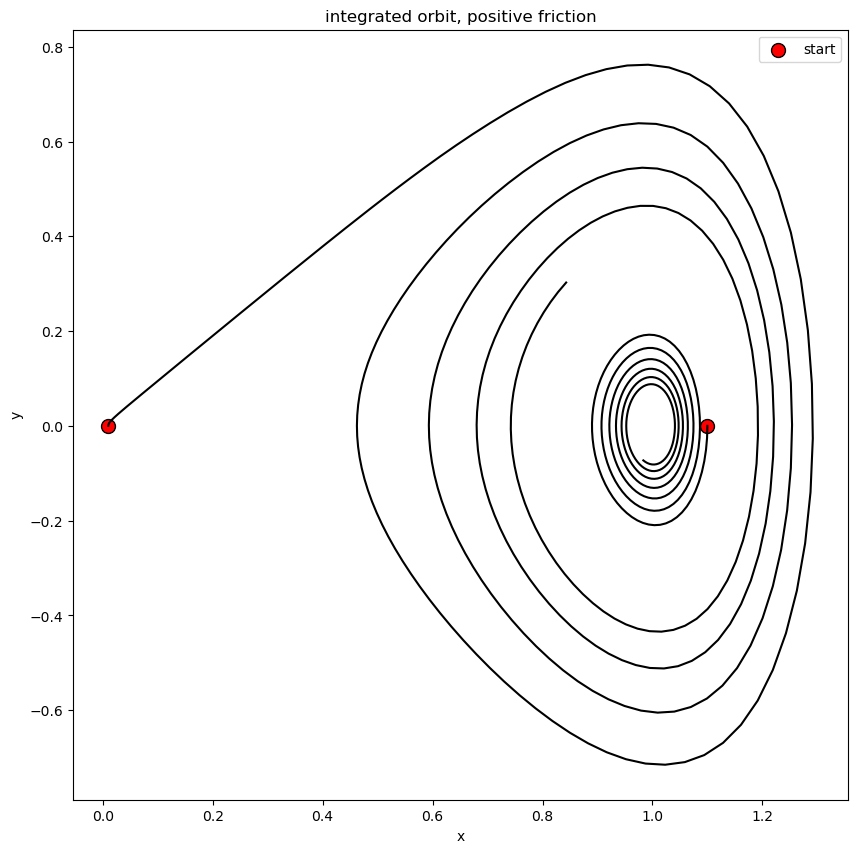

In [78]:
friction(0.1, 'integrated orbit, positive friction', 'posfric.png')

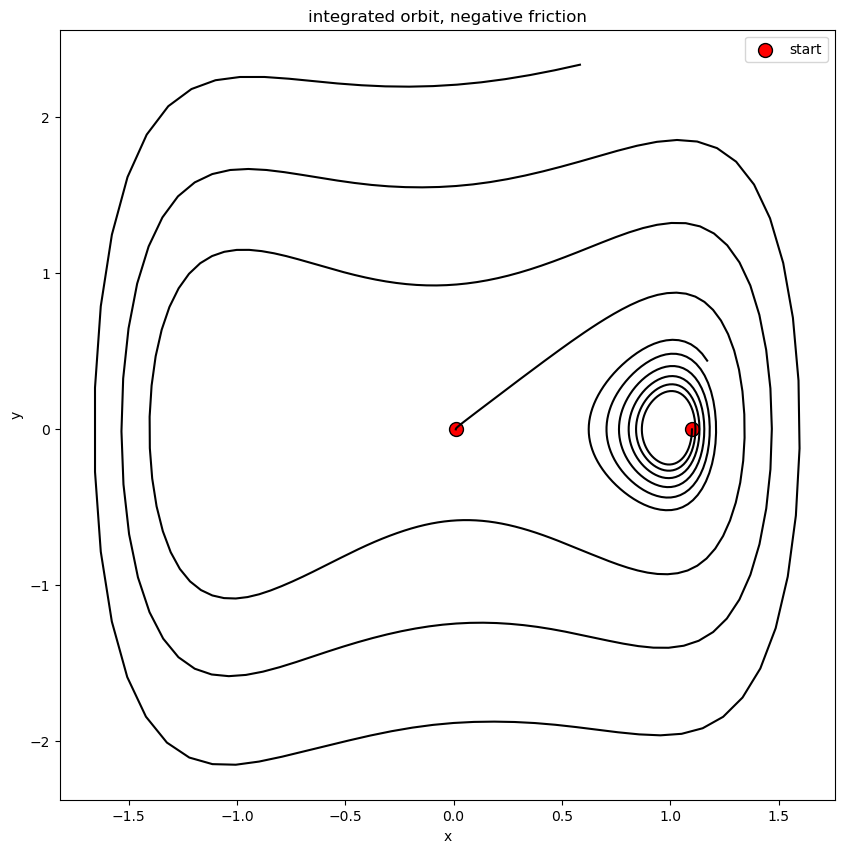

In [79]:
friction(-0.1, 'integrated orbit, negative friction', 'negfric.png')

# Exercise 2

In [85]:
import sympy as sp

x, X, q0, alpha, T = sp.symbols('x X q0 alpha T')

A0 = sp.Function('A0')(X,T)

u0 = A0 * sp.exp(sp.I*x*q0)

u1 = - alpha * x**2 * u0 / (8 * q0**2)

L = lambda f: sp.diff(f, x, x) + q0**2 * f

res = L(L(u1)).simplify()

res/u0

alpha

In [86]:
u1/u0

-alpha*x**2/(8*q0**2)

In [89]:
(u0 - u0**3 - sp.diff(u0, T) - 4*L(sp.diff(u1,X,x)) - 4 * sp.diff(u0, X, X, x, x)).simplify()

(-2*alpha*q0*x*Derivative(A0(X, T), X) + 3*I*alpha*Derivative(A0(X, T), X) + 4*q0**3*Derivative(A0(X, T), (X, 2)) - q0*A0(X, T)**3*exp(2*I*q0*x) + q0*A0(X, T) - q0*Derivative(A0(X, T), T))*exp(I*q0*x)/q0